In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
from scipy import stats

In [3]:
def load_data(excel_file, sheet_name="Feuil1"):
    """
    Charge les données du fichier Excel et nettoie les colonnes
    """
    # Charger les données
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Nettoyer les noms de colonnes (enlever les espaces)
    df.columns = [col.strip() for col in df.columns]
    
    print(f"Données chargées avec succès: {len(df)} lignes")
    print(f"Colonnes disponibles: {list(df.columns)}")
    
    return df

# Exécution de la cellule 2
excel_file = "review_landscape_stats.xlsx"
df = load_data(excel_file)

Données chargées avec succès: 2253 lignes
Colonnes disponibles: ['ID', 'NAME', 'STATUS', 'USER', 'WSI_ID', 'CL', 'USER_VALIDATOR']


In [4]:
def global_statistics(df):
    """
    Calcule les statistiques globales des annotations
    """
    print("=" * 50)
    print("STATISTIQUES GLOBALES")
    print("=" * 50)
    
    total_annotations = len(df)
    total_ok = len(df[df['STATUS'] == 'OK'])
    total_nok = total_annotations - total_ok
    
    print(f"Total des annotations: {total_annotations}")
    print(f"Annotations OK: {total_ok} ({(total_ok/total_annotations)*100:.2f}%)")
    print(f"Annotations NOK: {total_nok} ({(total_nok/total_annotations)*100:.2f}%)")
    
    # Statistiques par utilisateur (annotateur)
    user_counts = df['USER'].value_counts()
    print("\nNombre d'annotations par utilisateur:")
    print(user_counts)
    
    # Statistiques par validateur
    validator_counts = df['USER_VALIDATOR'].value_counts()
    print("\nNombre de validations par utilisateur:")
    print(validator_counts)
    
    return {
        'total': total_annotations,
        'ok': total_ok,
        'nok': total_nok,
        'user_counts': user_counts,
        'validator_counts': validator_counts
    }

In [5]:
def analyze_user4_user9_annotations(df):
    """
    Analyse les annotations faites par User4 et User9
    """
    print("=" * 50)
    print("ANNOTATIONS PAR USER4 ET USER9")
    print("=" * 50)
    
    # Filtrer les annotations de User4 et User9
    user4_user9_df = df[(df['USER'] == 'User4') | (df['USER'] == 'User9')]
    
    total_user4_user9 = len(user4_user9_df)
    ok_user4_user9 = len(user4_user9_df[user4_user9_df['STATUS'] == 'OK'])
    nok_user4_user9 = total_user4_user9 - ok_user4_user9
    
    print(f"Total des annotations par User4 et User9: {total_user4_user9}")
    print(f"Annotations OK: {ok_user4_user9} ({(ok_user4_user9/total_user4_user9)*100:.2f}%)")
    print(f"Annotations NOK: {nok_user4_user9} ({(nok_user4_user9/total_user4_user9)*100:.2f}%)")
    
    # Statistiques séparées pour User4
    user4_df = df[df['USER'] == 'User4']
    total_user4 = len(user4_df)
    ok_user4 = len(user4_df[user4_df['STATUS'] == 'OK'])
    
    print("\nStatistiques pour User4:")
    print(f"Total des annotations: {total_user4}")
    print(f"Annotations OK: {ok_user4} ({(ok_user4/total_user4)*100:.2f}%)")
    print(f"Annotations NOK: {total_user4 - ok_user4} ({((total_user4 - ok_user4)/total_user4)*100:.2f}%)")
    
    # Statistiques séparées pour User9
    user9_df = df[df['USER'] == 'User9']
    total_user9 = len(user9_df)
    ok_user9 = len(user9_df[user9_df['STATUS'] == 'OK'])
    
    print("\nStatistiques pour User9:")
    print(f"Total des annotations: {total_user9}")
    print(f"Annotations OK: {ok_user9} ({(ok_user9/total_user9)*100:.2f}%)")
    print(f"Annotations NOK: {total_user9 - ok_user9} ({((total_user9 - ok_user9)/total_user9)*100:.2f}%)")
    
    # Par validateur
    validator_counts = user4_user9_df['USER_VALIDATOR'].value_counts()
    print("\nValidateurs pour User4 et User9:")
    for validator, count in validator_counts.items():
        print(f"  {validator}: {count} ({(count/total_user4_user9)*100:.2f}%)")
    
    return {
        'total_user4_user9': total_user4_user9,
        'ok_user4_user9': ok_user4_user9,
        'nok_user4_user9': nok_user4_user9,
        'total_user4': total_user4,
        'ok_user4': ok_user4,
        'total_user9': total_user9,
        'ok_user9': ok_user9,
        'validator_counts': validator_counts
    }

In [6]:
def analyze_user4_user9_validations(df):
    """
    Analyse les validations faites par User4 et User9
    """
    print("=" * 50)
    print("VALIDATIONS PAR USER4 ET USER9")
    print("=" * 50)
    
    # Filtrer les validations de User4 et User9
    validated_by_user4_user9_df = df[(df['USER_VALIDATOR'] == 'User4') | (df['USER_VALIDATOR'] == 'User9')]
    
    total_validated = len(validated_by_user4_user9_df)
    ok_validated = len(validated_by_user4_user9_df[validated_by_user4_user9_df['STATUS'] == 'OK'])
    nok_validated = total_validated - ok_validated
    
    print(f"Total des validations par User4 et User9: {total_validated}")
    print(f"Validations OK: {ok_validated} ({(ok_validated/total_validated)*100:.2f}%)")
    print(f"Validations NOK: {nok_validated} ({(nok_validated/total_validated)*100:.2f}%)")
    
    # Statistiques séparées pour User4
    validated_by_user4_df = df[df['USER_VALIDATOR'] == 'User4']
    total_validated_user4 = len(validated_by_user4_df)
    ok_validated_user4 = len(validated_by_user4_df[validated_by_user4_df['STATUS'] == 'OK'])
    
    print("\nStatistiques des validations par User4:")
    print(f"Total des validations: {total_validated_user4}")
    print(f"Validations OK: {ok_validated_user4} ({(ok_validated_user4/total_validated_user4)*100:.2f}%)")
    print(f"Validations NOK: {total_validated_user4 - ok_validated_user4} ({((total_validated_user4 - ok_validated_user4)/total_validated_user4)*100:.2f}%)")
    
    # Statistiques séparées pour User9
    validated_by_user9_df = df[df['USER_VALIDATOR'] == 'User9']
    total_validated_user9 = len(validated_by_user9_df)
    ok_validated_user9 = len(validated_by_user9_df[validated_by_user9_df['STATUS'] == 'OK'])
    
    print("\nStatistiques des validations par User9:")
    print(f"Total des validations: {total_validated_user9}")
    print(f"Validations OK: {ok_validated_user9} ({(ok_validated_user9/total_validated_user9)*100:.2f}%)")
    print(f"Validations NOK: {total_validated_user9 - ok_validated_user9} ({((total_validated_user9 - ok_validated_user9)/total_validated_user9)*100:.2f}%)")
    
    # Par annotateur
    annotator_counts = validated_by_user4_user9_df['USER'].value_counts()
    print("\nAnnotateurs validés par User4 et User9:")
    for annotator, count in annotator_counts.items():
        print(f"  {annotator}: {count} ({(count/total_validated)*100:.2f}%)")
    
    return {
        'total_validated': total_validated,
        'ok_validated': ok_validated,
        'nok_validated': nok_validated,
        'total_validated_user4': total_validated_user4,
        'ok_validated_user4': ok_validated_user4,
        'total_validated_user9': total_validated_user9,
        'ok_validated_user9': ok_validated_user9,
        'annotator_counts': annotator_counts
    }

In [7]:
def compare_with_others(df):
    """
    Compare les statistiques de User4 et User9 avec les autres utilisateurs
    """
    print("=" * 50)
    print("COMPARAISON AVEC LES AUTRES UTILISATEURS")
    print("=" * 50)
    
    # Pour les annotations
    user4_user9_df = df[(df['USER'] == 'User4') | (df['USER'] == 'User9')]
    others_df = df[(df['USER'] != 'User4') & (df['USER'] != 'User9')]
    
    total_user4_user9 = len(user4_user9_df)
    ok_user4_user9 = len(user4_user9_df[user4_user9_df['STATUS'] == 'OK'])
    
    total_others = len(others_df)
    ok_others = len(others_df[others_df['STATUS'] == 'OK'])
    
    print("Taux de validation pour les annotations:")
    print(f"  User4 et User9: {(ok_user4_user9/total_user4_user9)*100:.2f}%")
    print(f"  Autres utilisateurs: {(ok_others/total_others)*100:.2f}%")
    print(f"  Différence: {(ok_user4_user9/total_user4_user9)*100 - (ok_others/total_others)*100:.2f}%")
    
    # Pour les validations
    validated_by_user4_user9_df = df[(df['USER_VALIDATOR'] == 'User4') | (df['USER_VALIDATOR'] == 'User9')]
    validated_by_others_df = df[(df['USER_VALIDATOR'] != 'User4') & (df['USER_VALIDATOR'] != 'User9')]
    
    total_validated_by_user4_user9 = len(validated_by_user4_user9_df)
    ok_validated_by_user4_user9 = len(validated_by_user4_user9_df[validated_by_user4_user9_df['STATUS'] == 'OK'])
    
    total_validated_by_others = len(validated_by_others_df)
    ok_validated_by_others = len(validated_by_others_df[validated_by_others_df['STATUS'] == 'OK'])
    
    print("\nTaux de validation pour les validations:")
    print(f"  User4 et User9: {(ok_validated_by_user4_user9/total_validated_by_user4_user9)*100:.2f}%")
    print(f"  Autres utilisateurs: {(ok_validated_by_others/total_validated_by_others)*100:.2f}%")
    print(f"  Différence: {(ok_validated_by_user4_user9/total_validated_by_user4_user9)*100 - (ok_validated_by_others/total_validated_by_others)*100:.2f}%")
    
    # Test statistique pour déterminer si les différences sont significatives
    # Test pour les annotations
    user4_user9_annot = user4_user9_df['STATUS'].map({'OK': 1, 'NOK': 0}).values
    others_annot = others_df['STATUS'].map({'OK': 1, 'NOK': 0}).values
    
    t_stat_annot, p_value_annot = stats.ttest_ind(user4_user9_annot, others_annot, equal_var=False)
    
    # Test pour les validations
    user4_user9_valid = validated_by_user4_user9_df['STATUS'].map({'OK': 1, 'NOK': 0}).values
    others_valid = validated_by_others_df['STATUS'].map({'OK': 1, 'NOK': 0}).values
    
    t_stat_valid, p_value_valid = stats.ttest_ind(user4_user9_valid, others_valid, equal_var=False)
    
    print("\nTests statistiques:")
    print(f"  p-value pour les annotations: {p_value_annot:.5f}")
    if p_value_annot < 0.05:
        print("  La différence est statistiquement significative (p < 0.05)")
    else:
        print("  La différence n'est pas statistiquement significative (p >= 0.05)")
    
    print(f"\n  p-value pour les validations: {p_value_valid:.5f}")
    if p_value_valid < 0.05:
        print("  La différence est statistiquement significative (p < 0.05)")
    else:
        print("  La différence n'est pas statistiquement significative (p >= 0.05)")
    
    return {
        'user4_user9_ok_rate': (ok_user4_user9/total_user4_user9)*100,
        'others_ok_rate': (ok_others/total_others)*100,
        'validated_by_user4_user9_ok_rate': (ok_validated_by_user4_user9/total_validated_by_user4_user9)*100,
        'validated_by_others_ok_rate': (ok_validated_by_others/total_validated_by_others)*100,
        'p_value_annot': p_value_annot,
        'p_value_valid': p_value_valid
    }

In [8]:
def analyze_classes(df):
    """
    Analyse les classes annotées par User4 et User9
    """
    print("=" * 50)
    print("ANALYSE DES CLASSES ANNOTÉES")
    print("=" * 50)
    
    # Classes annotées par User4
    user4_df = df[df['USER'] == 'User4']
    user4_classes = user4_df['CL'].value_counts()
    
    print("Top 5 des classes annotées par User4:")
    for cl, count in user4_classes.head(5).items():
        print(f"  {cl}: {count} ({(count/len(user4_df))*100:.2f}%)")
    
    # Classes annotées par User9
    user9_df = df[df['USER'] == 'User9']
    user9_classes = user9_df['CL'].value_counts()
    
    print("\nTop 5 des classes annotées par User9:")
    for cl, count in user9_classes.head(5).items():
        print(f"  {cl}: {count} ({(count/len(user9_df))*100:.2f}%)")
    
    # Classes communes
    common_classes = set(user4_classes.index) & set(user9_classes.index)
    print(f"\nNombre de classes communes entre User4 et User9: {len(common_classes)}")
    
    # Top 5 des classes communes
    if common_classes:
        print("Top classes communes:")
        common_class_counts = {}
        for cl in common_classes:
            common_class_counts[cl] = user4_classes.get(cl, 0) + user9_classes.get(cl, 0)
        
        top_common = sorted(common_class_counts.items(), key=lambda x: x[1], reverse=True)[:5]
        for cl, count in top_common:
            print(f"  {cl}: {count} (User4: {user4_classes.get(cl, 0)}, User9: {user9_classes.get(cl, 0)})")
    
    return {
        'user4_classes': user4_classes,
        'user9_classes': user9_classes,
        'common_classes': common_classes
    }


In [9]:
def create_basic_visualizations(results):
    """
    Crée des visualisations de base pour les statistiques d'annotations
    """
    # Configuration générale
    plt.style.use('ggplot')
    
    # 1. Taux de validation comme annotateurs
    plt.figure(figsize=(10, 6))
    
    users = ['User4', 'User9', 'User4+User9', 'Autres']
    rates = [
        results['annotations']['ok_user4'] / results['annotations']['total_user4'] * 100,
        results['annotations']['ok_user9'] / results['annotations']['total_user9'] * 100,
        results['annotations']['ok_user4_user9'] / results['annotations']['total_user4_user9'] * 100,
        results['comparison']['others_ok_rate']
    ]
    
    bars = plt.bar(users, rates, color=['blue', 'green', 'orange', 'gray'])
    
    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.2f}%', ha='center', va='bottom')
    
    plt.title('Taux de validation des annotations')
    plt.ylabel('Taux de validation (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('taux_validation_annotations.png')
    plt.close()
    
    # 2. Taux de validation comme validateurs
    plt.figure(figsize=(10, 6))
    
    rates_validators = [
        results['validations']['ok_validated_user4'] / results['validations']['total_validated_user4'] * 100,
        results['validations']['ok_validated_user9'] / results['validations']['total_validated_user9'] * 100,
        results['validations']['ok_validated'] / results['validations']['total_validated'] * 100,
        results['comparison']['validated_by_others_ok_rate']
    ]
    
    bars = plt.bar(users, rates_validators, color=['blue', 'green', 'orange', 'gray'])
    
    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.2f}%', ha='center', va='bottom')
    
    plt.title('Taux de validation en tant que validateurs')
    plt.ylabel('Taux de validation (%)')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('taux_validation_validateurs.png')
    plt.close()
    
    print("\nLes visualisations de base ont été enregistrées dans les fichiers suivants:")
    print("- taux_validation_annotations.png")
    print("- taux_validation_validateurs.png")

In [10]:
def create_advanced_visualizations(df, results):
    """
    Crée des visualisations avancées pour l'analyse comparative
    """
    # Configuration de seaborn
    sns.set(style="whitegrid")
    
    # 1. Comparaison des taux de validation par utilisateur
    plt.figure(figsize=(14, 8))
    
    # Créer un DataFrame avec les statistiques par utilisateur
    user_stats = []
    for user in df['USER'].unique():
        user_df = df[df['USER'] == user]
        total = len(user_df)
        if total < 10:  # Ignorer les utilisateurs avec moins de 10 annotations
            continue
        ok = len(user_df[user_df['STATUS'] == 'OK'])
        user_stats.append({
            'USER': user,
            'Total': total,
            'OK': ok,
            'Taux_OK': (ok/total)*100
        })
    
    user_stats_df = pd.DataFrame(user_stats)
    user_stats_df = user_stats_df.sort_values('Taux_OK', ascending=False)
    
    # Mettre en évidence User4 et User9
    colors = ['blue' if user == 'User4' else 'green' if user == 'User9' else 'gray' 
              for user in user_stats_df['USER']]
    
    # Créer le graphique
    bars = plt.bar(user_stats_df['USER'], user_stats_df['Taux_OK'], color=colors)
    
    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
    
    plt.title('Taux de validation par utilisateur (annotateur)', fontsize=14)
    plt.ylabel('Taux de validation (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.savefig('taux_validation_par_user.png')
    plt.close()
    
    # 2. Comparaison des taux de validation par validateur
    plt.figure(figsize=(14, 8))
    
    # Créer un DataFrame avec les statistiques par validateur
    validator_stats = []
    for validator in df['USER_VALIDATOR'].unique():
        validator_df = df[df['USER_VALIDATOR'] == validator]
        total = len(validator_df)
        if total < 10:  # Ignorer les validateurs avec moins de 10 validations
            continue
        ok = len(validator_df[validator_df['STATUS'] == 'OK'])
        validator_stats.append({
            'USER_VALIDATOR': validator,
            'Total': total,
            'OK': ok,
            'Taux_OK': (ok/total)*100
        })
    
    validator_stats_df = pd.DataFrame(validator_stats)
    validator_stats_df = validator_stats_df.sort_values('Taux_OK', ascending=False)
    
    # Mettre en évidence User4 et User9
    colors = ['blue' if validator == 'User4' else 'green' if validator == 'User9' else 'gray' 
              for validator in validator_stats_df['USER_VALIDATOR']]
    
    # Créer le graphique
    bars = plt.bar(validator_stats_df['USER_VALIDATOR'], validator_stats_df['Taux_OK'], color=colors)
    
    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
    
    plt.title('Taux de validation par validateur', fontsize=14)
    plt.ylabel('Taux de validation (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.savefig('taux_validation_par_validateur.png')
    plt.close()
    
    # 3. Matrice de confusion pour User4 comme validateur
    user4_validator_df = df[df['USER_VALIDATOR'] == 'User4']
    if not user4_validator_df.empty:
        # Créer une table croisée des statuts par utilisateur
        user4_validator_crosstab = pd.crosstab(user4_validator_df['USER'], user4_validator_df['STATUS'])
        
        # Ajouter les totaux et les taux
        if 'OK' in user4_validator_crosstab.columns and 'NOK' in user4_validator_crosstab.columns:
            user4_validator_crosstab['Total'] = user4_validator_crosstab['OK'] + user4_validator_crosstab['NOK']
            user4_validator_crosstab['Taux_OK'] = user4_validator_crosstab['OK'] / user4_validator_crosstab['Total'] * 100
            
            # Filtrer les utilisateurs avec au moins 5 annotations
            user4_validator_crosstab = user4_validator_crosstab[user4_validator_crosstab['Total'] >= 5]
            
            # Trier par taux de validation
            user4_validator_crosstab = user4_validator_crosstab.sort_values('Taux_OK', ascending=False)
            
            plt.figure(figsize=(12, 8))
            
            # Heatmap des valeurs absolues
            plt.subplot(1, 2, 1)
            sns.heatmap(user4_validator_crosstab[['OK', 'NOK']], annot=True, fmt='d', cmap='Blues')
            plt.title('User4 comme validateur\n(nombre absolu)', fontsize=12)
            
            # Heatmap des pourcentages
            plt.subplot(1, 2, 2)
            percentage_data = user4_validator_crosstab[['OK', 'NOK']].div(user4_validator_crosstab['Total'], axis=0) * 100
            sns.heatmap(percentage_data, annot=True, fmt='.1f', cmap='Blues')
            plt.title('User4 comme validateur\n(pourcentage)', fontsize=12)
            
            plt.tight_layout()
            plt.savefig('confusion_matrix_user4.png')
            plt.close()
    
    # 4. Matrice de confusion pour User9 comme validateur
    user9_validator_df = df[df['USER_VALIDATOR'] == 'User9']
    if not user9_validator_df.empty:
        # Créer une table croisée des statuts par utilisateur
        user9_validator_crosstab = pd.crosstab(user9_validator_df['USER'], user9_validator_df['STATUS'])
        
        # Ajouter les totaux et les taux
        if 'OK' in user9_validator_crosstab.columns and 'NOK' in user9_validator_crosstab.columns:
            user9_validator_crosstab['Total'] = user9_validator_crosstab['OK'] + user9_validator_crosstab['NOK']
            user9_validator_crosstab['Taux_OK'] = user9_validator_crosstab['OK'] / user9_validator_crosstab['Total'] * 100
            
            # Filtrer les utilisateurs avec au moins 5 annotations
            user9_validator_crosstab = user9_validator_crosstab[user9_validator_crosstab['Total'] >= 5]
            
            # Trier par taux de validation
            user9_validator_crosstab = user9_validator_crosstab.sort_values('Taux_OK', ascending=False)
            
            plt.figure(figsize=(12, 8))
            
            # Heatmap des valeurs absolues
            plt.subplot(1, 2, 1)
            sns.heatmap(user9_validator_crosstab[['OK', 'NOK']], annot=True, fmt='d', cmap='Greens')
            plt.title('User9 comme validateur\n(nombre absolu)', fontsize=12)
            
            # Heatmap des pourcentages
            plt.subplot(1, 2, 2)
            percentage_data = user9_validator_crosstab[['OK', 'NOK']].div(user9_validator_crosstab['Total'], axis=0) * 100
            sns.heatmap(percentage_data, annot=True, fmt='.1f', cmap='Greens')
            plt.title('User9 comme validateur\n(pourcentage)', fontsize=12)
            
            plt.tight_layout()
            plt.savefig('confusion_matrix_user9.png')
            plt.close()
    
    print("\nLes visualisations avancées ont été enregistrées dans les fichiers suivants:")
    print("- taux_validation_par_user.png")
    print("- taux_validation_par_validateur.png")
    print("- confusion_matrix_user4.png")
    print("- confusion_matrix_user9.png")

In [11]:
def main():
    """
    Fonction principale qui exécute l'analyse complète
    """
    print("Analyse des annotations des utilisateurs 4 et 9")
    print("=" * 50)
    
    # Charger les données
    excel_file = "./review_landscape_stats.xlsx"
    df = load_data(excel_file)
    
    # Exécuter les analyses
    global_stats = global_statistics(df)
    annotations_stats = analyze_user4_user9_annotations(df)
    validations_stats = analyze_user4_user9_validations(df)
    comparison_stats = compare_with_others(df)
    classes_stats = analyze_classes(df)
    
    # Regrouper les résultats
    results

In [12]:
# ============================================================================
# NOUVELLES CELLULES À AJOUTER AU NOTEBOOK EXISTANT
# ============================================================================

# CELLULE 1: Analyse globale des types d'annotations
def analyze_annotation_types_global(df):
    """
    Analyse globale des types d'annotations
    """
    print("=" * 50)
    print("ANALYSE GLOBALE DES TYPES D'ANNOTATIONS")
    print("=" * 50)
    
    # Statistiques générales par type
    type_counts = df['CL'].value_counts()
    type_stats = {}
    
    print(f"Nombre total de types d'annotations: {len(type_counts)}")
    print(f"Total des annotations: {len(df)}")
    
    print("\nTop 10 des types les plus fréquents:")
    for i, (annotation_type, count) in enumerate(type_counts.head(10).items(), 1):
        type_df = df[df['CL'] == annotation_type]
        ok_count = len(type_df[type_df['STATUS'] == 'OK'])
        ok_rate = (ok_count / count) * 100
        
        type_stats[annotation_type] = {
            'total': count,
            'ok': ok_count,
            'nok': count - ok_count,
            'ok_rate': ok_rate
        }
        
        print(f"  {i:2d}. {annotation_type}: {count} annotations ({ok_rate:.2f}% OK)")
    
    return type_stats


In [13]:

# CELLULE 2: Analyse des types d'annotations par utilisateur
def analyze_annotation_types_by_user(df, target_users=['User4', 'User9']):
    """
    Analyse des types d'annotations par utilisateur spécifique
    """
    print("=" * 60)
    print(f"ANALYSE DES TYPES D'ANNOTATIONS PAR {' ET '.join(target_users)}")
    print("=" * 60)
    
    results = {}
    
    for user in target_users:
        print(f"\n--- Analyse pour {user} ---")
        user_df = df[df['USER'] == user]
        
        if len(user_df) == 0:
            print(f"Aucune annotation trouvée pour {user}")
            continue
            
        user_type_counts = user_df['CL'].value_counts()
        user_stats = {}
        
        print(f"Nombre de types annotés par {user}: {len(user_type_counts)}")
        print(f"Total des annotations par {user}: {len(user_df)}")
        
        print(f"\nTop 10 des types annotés par {user}:")
        for i, (annotation_type, count) in enumerate(user_type_counts.head(10).items(), 1):
            type_df = user_df[user_df['CL'] == annotation_type]
            ok_count = len(type_df[type_df['STATUS'] == 'OK'])
            ok_rate = (ok_count / count) * 100
            
            user_stats[annotation_type] = {
                'total': count,
                'ok': ok_count,
                'nok': count - ok_count,
                'ok_rate': ok_rate
            }
            
            print(f"  {i:2d}. {annotation_type}: {count} annotations ({ok_rate:.2f}% OK)")
        
        results[user] = user_stats
    
    return results


In [14]:

# CELLULE 3: Taux de validation par type d'annotation
def analyze_annotation_types_validation_rates(df):
    """
    Analyse des taux de validation par type d'annotation
    """
    print("=" * 50)
    print("TAUX DE VALIDATION PAR TYPE D'ANNOTATION")
    print("=" * 50)
    
    type_validation_stats = {}
    type_counts = df['CL'].value_counts()
    
    # Analyser seulement les types avec au moins 10 annotations
    significant_types = type_counts[type_counts >= 10].index
    
    validation_data = []
    
    for annotation_type in significant_types:
        type_df = df[df['CL'] == annotation_type]
        total = len(type_df)
        ok = len(type_df[type_df['STATUS'] == 'OK'])
        ok_rate = (ok / total) * 100
        
        type_validation_stats[annotation_type] = {
            'total': total,
            'ok': ok,
            'nok': total - ok,
            'ok_rate': ok_rate
        }
        
        validation_data.append({
            'type': annotation_type,
            'total': total,
            'ok_rate': ok_rate
        })
    
    # Trier par taux de validation
    validation_data.sort(key=lambda x: x['ok_rate'], reverse=True)
    
    print("Types d'annotations avec les MEILLEURS taux de validation (≥10 annotations):")
    for i, data in enumerate(validation_data[:10], 1):
        print(f"  {i:2d}. {data['type']}: {data['ok_rate']:.2f}% OK ({data['total']} total)")
    
    print("\nTypes d'annotations avec les PLUS FAIBLES taux de validation (≥10 annotations):")
    for i, data in enumerate(validation_data[-10:], 1):
        print(f"  {i:2d}. {data['type']}: {data['ok_rate']:.2f}% OK ({data['total']} total)")
    
    return type_validation_stats


In [15]:

# CELLULE 4: Performance des utilisateurs par type d'annotation
def analyze_user_performance_by_annotation_type(df, target_users=['User4', 'User9']):
    """
    Analyse des performances des utilisateurs spécifiques par type d'annotation
    """
    print("=" * 60)
    print(f"PERFORMANCE DE {' ET '.join(target_users)} PAR TYPE D'ANNOTATION")
    print("=" * 60)
    
    results = {}
    
    for user in target_users:
        print(f"\n--- Performance de {user} par type ---")
        user_df = df[df['USER'] == user]
        
        if len(user_df) == 0:
            continue
            
        user_type_performance = {}
        user_type_counts = user_df['CL'].value_counts()
        
        # Analyser les types avec au moins 5 annotations par cet utilisateur
        significant_types = user_type_counts[user_type_counts >= 5].index
        
        performance_data = []
        
        for annotation_type in significant_types:
            type_df = user_df[user_df['CL'] == annotation_type]
            total = len(type_df)
            ok = len(type_df[type_df['STATUS'] == 'OK'])
            ok_rate = (ok / total) * 100
            
            user_type_performance[annotation_type] = {
                'total': total,
                'ok': ok,
                'ok_rate': ok_rate
            }
            
            performance_data.append({
                'type': annotation_type,
                'total': total,
                'ok_rate': ok_rate
            })
        
        # Trier par taux de validation
        performance_data.sort(key=lambda x: x['ok_rate'], reverse=True)
        
        print(f"Meilleure performance de {user} (≥5 annotations par type):")
        for i, data in enumerate(performance_data[:5], 1):
            print(f"  {i}. {data['type']}: {data['ok_rate']:.2f}% OK ({data['total']} total)")
        
        if len(performance_data) > 5:
            print(f"\nPlus faible performance de {user}:")
            for i, data in enumerate(performance_data[-5:], 1):
                print(f"  {i}. {data['type']}: {data['ok_rate']:.2f}% OK ({data['total']} total)")
        
        results[user] = user_type_performance
    
    return results


In [16]:

# CELLULE 5: Comparaison entre User4 et User9 par type
def compare_annotation_types_between_users(df, user1='User4', user2='User9'):
    """
    Compare les performances entre deux utilisateurs pour les mêmes types d'annotations
    """
    print("=" * 60)
    print(f"COMPARAISON {user1} vs {user2} PAR TYPE D'ANNOTATION")
    print("=" * 60)
    
    user1_df = df[df['USER'] == user1]
    user2_df = df[df['USER'] == user2]
    
    # Trouver les types communs avec au moins 3 annotations par utilisateur
    user1_types = set(user1_df['CL'].value_counts()[user1_df['CL'].value_counts() >= 3].index)
    user2_types = set(user2_df['CL'].value_counts()[user2_df['CL'].value_counts() >= 3].index)
    common_types = user1_types & user2_types
    
    print(f"Types d'annotations communs entre {user1} et {user2} (≥3 par utilisateur): {len(common_types)}")
    
    comparison_data = []
    
    for annotation_type in common_types:
        user1_type_df = user1_df[user1_df['CL'] == annotation_type]
        user2_type_df = user2_df[user2_df['CL'] == annotation_type]
        
        user1_total = len(user1_type_df)
        user1_ok = len(user1_type_df[user1_type_df['STATUS'] == 'OK'])
        user1_ok_rate = (user1_ok / user1_total) * 100
        
        user2_total = len(user2_type_df)
        user2_ok = len(user2_type_df[user2_type_df['STATUS'] == 'OK'])
        user2_ok_rate = (user2_ok / user2_total) * 100
        
        difference = user1_ok_rate - user2_ok_rate
        
        comparison_data.append({
            'type': annotation_type,
            'user1_rate': user1_ok_rate,
            'user2_rate': user2_ok_rate,
            'difference': difference,
            'user1_total': user1_total,
            'user2_total': user2_total
        })
    
    # Trier par différence absolue
    comparison_data.sort(key=lambda x: abs(x['difference']), reverse=True)
    
    print(f"\nPlus grandes différences de performance entre {user1} et {user2}:")
    for i, data in enumerate(comparison_data[:10], 1):
        better_user = user1 if data['difference'] > 0 else user2
        print(f"  {i:2d}. {data['type']}:")
        print(f"      {user1}: {data['user1_rate']:.1f}% OK ({data['user1_total']} total)")
        print(f"      {user2}: {data['user2_rate']:.1f}% OK ({data['user2_total']} total)")
        print(f"      Différence: {abs(data['difference']):.1f}% (avantage {better_user})")
    
    return comparison_data


In [17]:

# CELLULE 6: Analyse des validations par type
def analyze_annotation_types_by_validator(df, target_validators=['User4', 'User9']):
    """
    Analyse des types d'annotations validées par des validateurs spécifiques
    """
    print("=" * 60)
    print(f"VALIDATIONS PAR TYPE - VALIDATEURS {' ET '.join(target_validators)}")
    print("=" * 60)
    
    results = {}
    
    for validator in target_validators:
        print(f"\n--- Validations par {validator} ---")
        validator_df = df[df['USER_VALIDATOR'] == validator]
        
        if len(validator_df) == 0:
            print(f"Aucune validation trouvée pour {validator}")
            continue
            
        validator_type_counts = validator_df['CL'].value_counts()
        validator_stats = {}
        
        print(f"Nombre de types validés par {validator}: {len(validator_type_counts)}")
        print(f"Total des validations par {validator}: {len(validator_df)}")
        
        print(f"\nTop 10 des types validés par {validator}:")
        for i, (annotation_type, count) in enumerate(validator_type_counts.head(10).items(), 1):
            type_df = validator_df[validator_df['CL'] == annotation_type]
            ok_count = len(type_df[type_df['STATUS'] == 'OK'])
            ok_rate = (ok_count / count) * 100
            
            validator_stats[annotation_type] = {
                'total': count,
                'ok': ok_count,
                'nok': count - ok_count,
                'ok_rate': ok_rate
            }
            
            print(f"  {i:2d}. {annotation_type}: {count} validations ({ok_rate:.2f}% OK)")
        
        results[validator] = validator_stats
    
    return results


In [18]:

# CELLULE 7: Visualisations par type d'annotation
def create_annotation_type_visualizations(df, results):
    """
    Créer des visualisations pour l'analyse par type d'annotation
    """
    print("=" * 50)
    print("CRÉATION DES VISUALISATIONS PAR TYPE")
    print("=" * 50)
    
    # Configuration
    plt.style.use('ggplot')
    
    # 1. Taux de validation par type d'annotation (top 15)
    plt.figure(figsize=(16, 10))
    
    type_counts = df['CL'].value_counts()
    significant_types = type_counts[type_counts >= 10].index[:15]  # Top 15 avec au moins 10 annotations
    
    rates_data = []
    type_names = []
    
    for annotation_type in significant_types:
        type_df = df[df['CL'] == annotation_type]
        ok_rate = (len(type_df[type_df['STATUS'] == 'OK']) / len(type_df)) * 100
        rates_data.append(ok_rate)
        # Tronquer les noms longs pour l'affichage
        display_name = annotation_type if len(annotation_type) <= 30 else annotation_type[:27] + "..."
        type_names.append(display_name)
    
    # Trier par taux de validation
    sorted_data = sorted(zip(rates_data, type_names), reverse=True)
    rates_data, type_names = zip(*sorted_data)
    
    bars = plt.barh(range(len(type_names)), rates_data, color='skyblue')
    
    # Ajouter les valeurs
    for i, (bar, rate) in enumerate(zip(bars, rates_data)):
        plt.text(rate + 1, i, f'{rate:.1f}%', va='center', fontsize=9)
    
    plt.yticks(range(len(type_names)), type_names, fontsize=10)
    plt.xlabel('Taux de validation (%)', fontsize=12)
    plt.title('Taux de validation par type d\'annotation (Top 15)', fontsize=14)
    plt.xlim(0, 105)
    plt.tight_layout()
    plt.savefig('taux_validation_par_type.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Performance User4 vs User9 par type
    user4_df = df[df['USER'] == 'User4']
    user9_df = df[df['USER'] == 'User9']
    
    # Trouver types communs avec au moins 5 annotations
    user4_types = set(user4_df['CL'].value_counts()[user4_df['CL'].value_counts() >= 5].index)
    user9_types = set(user9_df['CL'].value_counts()[user9_df['CL'].value_counts() >= 5].index)
    common_types = list(user4_types & user9_types)[:10]  # Top 10
    
    if common_types:
        user4_rates = []
        user9_rates = []
        
        for annotation_type in common_types:
            user4_type_df = user4_df[user4_df['CL'] == annotation_type]
            user4_rate = (len(user4_type_df[user4_type_df['STATUS'] == 'OK']) / len(user4_type_df)) * 100
            user4_rates.append(user4_rate)
            
            user9_type_df = user9_df[user9_df['CL'] == annotation_type]
            user9_rate = (len(user9_type_df[user9_type_df['STATUS'] == 'OK']) / len(user9_type_df)) * 100
            user9_rates.append(user9_rate)
        
        plt.figure(figsize=(14, 8))
        
        x = np.arange(len(common_types))
        width = 0.35
        
        plt.bar(x - width/2, user4_rates, width, label='User4', color='blue', alpha=0.7)
        plt.bar(x + width/2, user9_rates, width, label='User9', color='green', alpha=0.7)
        
        # Tronquer les noms pour l'affichage
        display_names = [name[:20] + "..." if len(name) > 20 else name for name in common_types]
        plt.xticks(x, display_names, rotation=45, ha='right', fontsize=10)
        plt.ylabel('Taux de validation (%)', fontsize=12)
        plt.title('Comparaison User4 vs User9 par type d\'annotation', fontsize=14)
        plt.legend()
        plt.ylim(0, 105)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.savefig('comparaison_user4_user9_par_type.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    # 3. Distribution des types d'annotations (camembert des top 10)
    plt.figure(figsize=(12, 8))
    
    top_types = df['CL'].value_counts().head(10)
    other_count = df['CL'].value_counts().iloc[10:].sum()
    
    if other_count > 0:
        labels = list(top_types.index) + ['Autres']
        sizes = list(top_types.values) + [other_count]
    else:
        labels = list(top_types.index)
        sizes = list(top_types.values)
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))
    
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title('Distribution des types d\'annotations (Top 10 + Autres)', fontsize=14)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('distribution_types_annotations.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Visualisations créées:")
    print("- taux_validation_par_type.png")
    print("- comparaison_user4_user9_par_type.png") 
    print("- distribution_types_annotations.png")


In [19]:

# CELLULE 8: Fonction principale d'analyse par type
def main_annotation_type_analysis():
    """
    Fonction principale pour l'analyse par type d'annotation
    """
    print("ANALYSE COMPLÈTE PAR TYPE D'ANNOTATION")
    print("=" * 60)
    
    # Exécuter toutes les analyses par type
    global_type_stats = analyze_annotation_types_global(df)
    user_type_stats = analyze_annotation_types_by_user(df, ['User4', 'User9'])
    validation_rates = analyze_annotation_types_validation_rates(df)
    user_performance = analyze_user_performance_by_annotation_type(df, ['User4', 'User9'])
    comparison = compare_annotation_types_between_users(df, 'User4', 'User9')
    validator_analysis = analyze_annotation_types_by_validator(df, ['User4', 'User9'])
    
    # Regrouper les résultats
    results = {
        'global_type_stats': global_type_stats,
        'user_type_stats': user_type_stats,
        'validation_rates': validation_rates,
        'user_performance': user_performance,
        'comparison': comparison,
        'validator_analysis': validator_analysis
    }
    
    # Créer les visualisations
    create_annotation_type_visualizations(df, results)
    
    print("\n" + "=" * 60)
    print("ANALYSE PAR TYPE D'ANNOTATION TERMINÉE")
    print("=" * 60)
    
    return results


In [20]:

# CELLULE 9: Exécution de l'analyse complète par type
# Exécuter l'analyse complète par type d'annotation
type_analysis_results = main_annotation_type_analysis()

ANALYSE COMPLÈTE PAR TYPE D'ANNOTATION
ANALYSE GLOBALE DES TYPES D'ANNOTATIONS
Nombre total de types d'annotations: 25
Total des annotations: 2253

Top 10 des types les plus fréquents:
   1. Macrophages: 394 annotations (97.72% OK)
   2. Peri. mono. infiltr. (A Grade): 338 annotations (72.49% OK)
   3. Large airway lymphocytic inflammation: 105 annotations (96.19% OK)
   4. Hemosiderosis: 90 annotations (97.78% OK)
   5. Other: 87 annotations (73.56% OK)
   6. Gran. tissue plugs in alveolar spaces: 68 annotations (91.18% OK)
   7. BALT: 64 annotations (81.25% OK)
   8. Pneu. hypertr. / react. chang.: 58 annotations (100.00% OK)
   9. Fibrin balls in alveolar spaces: 38 annotations (52.63% OK)
  10. Neutrophils in alveolar septa: 36 annotations (80.56% OK)
ANALYSE DES TYPES D'ANNOTATIONS PAR User4 ET User9

--- Analyse pour User4 ---
Nombre de types annotés par User4: 12
Total des annotations par User4: 89

Top 10 des types annotés par User4:
   1. Fibrin balls in alveolar spaces: 26 an

In [21]:
def create_advanced_user4_user9_visualizations(df):
    """
    Créer des visualisations avancées spécifiquement pour User4 et User9
    """
    print("=" * 60)
    print("CRÉATION DES VISUALISATIONS AVANCÉES POUR USER4 ET USER9")
    print("=" * 60)
    
    # Configuration générale
    plt.style.use('ggplot')
    sns.set_palette("husl")
    
    # Préparation des données
    user4_df = df[df['USER'] == 'User4'].copy()
    user9_df = df[df['USER'] == 'User9'].copy()
    
    # 1. HEATMAP DE PERFORMANCE PAR TYPE D'ANNOTATION
    print("1. Création de la heatmap de performance par type...")
    
    # Calculer les performances par type pour chaque utilisateur
    def get_user_type_performance(user_df, min_annotations=2):
        type_performance = {}
        for annotation_type in user_df['CL'].value_counts().index:
            type_data = user_df[user_df['CL'] == annotation_type]
            if len(type_data) >= min_annotations:
                ok_rate = (len(type_data[type_data['STATUS'] == 'OK']) / len(type_data)) * 100
                type_performance[annotation_type] = ok_rate
        return type_performance
    
    user4_performance = get_user_type_performance(user4_df)
    user9_performance = get_user_type_performance(user9_df)
    
    # Créer une matrice de performance
    all_types = set(user4_performance.keys()) | set(user9_performance.keys())
    performance_matrix = []
    type_labels = []
    
    for annotation_type in sorted(all_types):
        if annotation_type in user4_performance and annotation_type in user9_performance:
            performance_matrix.append([
                user4_performance[annotation_type],
                user9_performance[annotation_type]
            ])
            type_labels.append(annotation_type[:25] + "..." if len(annotation_type) > 25 else annotation_type)
    
    if performance_matrix:
        plt.figure(figsize=(10, max(8, len(type_labels) * 0.4)))
        
        performance_matrix = np.array(performance_matrix)
        
        # Créer la heatmap
        ax = sns.heatmap(performance_matrix, 
                        xticklabels=['User4', 'User9'],
                        yticklabels=type_labels,
                        annot=True, 
                        fmt='.1f',
                        cmap='RdYlGn',
                        center=80,
                        cbar_kws={'label': 'Taux de validation (%)'})
        
        plt.title('Heatmap des performances User4 vs User9 par type d\'annotation', fontsize=14, pad=20)
        plt.xlabel('Utilisateur', fontsize=12)
        plt.ylabel('Type d\'annotation', fontsize=12)
        plt.tight_layout()
        plt.savefig('heatmap_user4_user9_performance.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    # 2. GRAPHIQUE RADAR DES PERFORMANCES
    print("2. Création du graphique radar...")
    
    # Sélectionner les types les plus fréquents communs
    common_types = []
    for t in user4_df['CL'].value_counts().index[:10]:
        if t in user9_df['CL'].value_counts().index and \
           len(user4_df[user4_df['CL'] == t]) >= 3 and \
           len(user9_df[user9_df['CL'] == t]) >= 3:
            common_types.append(t)
    
    if len(common_types) >= 3:
        # Calculer les performances pour le radar
        user4_radar_data = []
        user9_radar_data = []
        radar_labels = []
        
        for annotation_type in common_types[:8]:  # Maximum 8 pour lisibilité
            user4_type_data = user4_df[user4_df['CL'] == annotation_type]
            user9_type_data = user9_df[user9_df['CL'] == annotation_type]
            
            user4_rate = (len(user4_type_data[user4_type_data['STATUS'] == 'OK']) / len(user4_type_data)) * 100
            user9_rate = (len(user9_type_data[user9_type_data['STATUS'] == 'OK']) / len(user9_type_data)) * 100
            
            user4_radar_data.append(user4_rate)
            user9_radar_data.append(user9_rate)
            radar_labels.append(annotation_type[:15] + "..." if len(annotation_type) > 15 else annotation_type)
        
        # Créer le graphique radar
        angles = np.linspace(0, 2 * np.pi, len(radar_labels), endpoint=False).tolist()
        angles += angles[:1]  # Fermer le cercle
        
        user4_radar_data += user4_radar_data[:1]
        user9_radar_data += user9_radar_data[:1]
        
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
        
        ax.plot(angles, user4_radar_data, 'o-', linewidth=2, label='User4', color='blue')
        ax.fill(angles, user4_radar_data, alpha=0.25, color='blue')
        
        ax.plot(angles, user9_radar_data, 'o-', linewidth=2, label='User9', color='green')
        ax.fill(angles, user9_radar_data, alpha=0.25, color='green')
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(radar_labels)
        ax.set_ylim(0, 100)
        ax.set_ylabel('Taux de validation (%)', labelpad=30)
        ax.set_title('Comparaison radar User4 vs User9\\npar type d\'annotation', pad=30, fontsize=14)
        ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
        ax.grid(True)
        
        plt.tight_layout()
        plt.savefig('radar_user4_user9_performance.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    # 3. GRAPHIQUE EN BARRES EMPILÉES - VOLUME ET PERFORMANCE
    print("3. Création du graphique en barres empilées...")
    
    # Top 10 des types les plus annotés par User4 et User9
    user4_top_types = user4_df['CL'].value_counts().head(10)
    user9_top_types = user9_df['CL'].value_counts().head(10)
    all_top_types = set(user4_top_types.index) | set(user9_top_types.index)
    
    # Préparer les données pour le graphique empilé
    types_data = []
    for annotation_type in all_top_types:
        user4_type_data = user4_df[user4_df['CL'] == annotation_type]
        user9_type_data = user9_df[user9_df['CL'] == annotation_type]
        
        user4_total = len(user4_type_data)
        user4_ok = len(user4_type_data[user4_type_data['STATUS'] == 'OK'])
        user4_nok = user4_total - user4_ok
        
        user9_total = len(user9_type_data)
        user9_ok = len(user9_type_data[user9_type_data['STATUS'] == 'OK'])
        user9_nok = user9_total - user9_ok
        
        if user4_total > 0 or user9_total > 0:
            types_data.append({
                'type': annotation_type,
                'user4_ok': user4_ok,
                'user4_nok': user4_nok,
                'user9_ok': user9_ok,
                'user9_nok': user9_nok,
                'total': user4_total + user9_total
            })
    
    # Trier par volume total
    types_data.sort(key=lambda x: x['total'], reverse=True)
    types_data = types_data[:12]  # Top 12
    
    if types_data:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        type_names = [item['type'][:20] + "..." if len(item['type']) > 20 else item['type'] for item in types_data]
        
        # Graphique User4
        user4_ok_counts = [item['user4_ok'] for item in types_data]
        user4_nok_counts = [item['user4_nok'] for item in types_data]
        
        x = np.arange(len(type_names))
        ax1.bar(x, user4_ok_counts, label='OK', color='lightgreen', alpha=0.8)
        ax1.bar(x, user4_nok_counts, bottom=user4_ok_counts, label='NOK', color='lightcoral', alpha=0.8)
        
        ax1.set_title('User4 - Volume et statut par type', fontsize=12)
        ax1.set_xlabel('Type d\'annotation')
        ax1.set_ylabel('Nombre d\'annotations')
        ax1.set_xticks(x)
        ax1.set_xticklabels(type_names, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)
        
        # Graphique User9
        user9_ok_counts = [item['user9_ok'] for item in types_data]
        user9_nok_counts = [item['user9_nok'] for item in types_data]
        
        ax2.bar(x, user9_ok_counts, label='OK', color='lightgreen', alpha=0.8)
        ax2.bar(x, user9_nok_counts, bottom=user9_ok_counts, label='NOK', color='lightcoral', alpha=0.8)
        
        ax2.set_title('User9 - Volume et statut par type', fontsize=12)
        ax2.set_xlabel('Type d\'annotation')
        ax2.set_ylabel('Nombre d\'annotations')
        ax2.set_xticks(x)
        ax2.set_xticklabels(type_names, rotation=45, ha='right')
        ax2.legend()
        ax2.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('barres_empilees_user4_user9.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    # 4. SCATTER PLOT - VOLUME vs PERFORMANCE
    print("4. Création du scatter plot volume vs performance...")
    
    # Préparer les données pour scatter plot
    scatter_data = []
    for annotation_type in df['CL'].unique():
        user4_type_data = user4_df[user4_df['CL'] == annotation_type]
        user9_type_data = user9_df[user9_df['CL'] == annotation_type]
        
        if len(user4_type_data) > 0:
            user4_rate = (len(user4_type_data[user4_type_data['STATUS'] == 'OK']) / len(user4_type_data)) * 100
            scatter_data.append({
                'user': 'User4',
                'type': annotation_type,
                'volume': len(user4_type_data),
                'performance': user4_rate
            })
        
        if len(user9_type_data) > 0:
            user9_rate = (len(user9_type_data[user9_type_data['STATUS'] == 'OK']) / len(user9_type_data)) * 100
            scatter_data.append({
                'user': 'User9',
                'type': annotation_type,
                'volume': len(user9_type_data),
                'performance': user9_rate
            })
    
    if scatter_data:
        plt.figure(figsize=(12, 8))
        
        user4_data = [item for item in scatter_data if item['user'] == 'User4']
        user9_data = [item for item in scatter_data if item['user'] == 'User9']
        
        if user4_data:
            user4_volumes = [item['volume'] for item in user4_data]
            user4_performances = [item['performance'] for item in user4_data]
            plt.scatter(user4_volumes, user4_performances, 
                       label='User4', alpha=0.7, s=100, color='blue')
        
        if user9_data:
            user9_volumes = [item['volume'] for item in user9_data]
            user9_performances = [item['performance'] for item in user9_data]
            plt.scatter(user9_volumes, user9_performances, 
                       label='User9', alpha=0.7, s=100, color='green')
        
        plt.xlabel('Volume d\'annotations par type', fontsize=12)
        plt.ylabel('Taux de validation (%)', fontsize=12)
        plt.title('Relation Volume vs Performance par type\\nUser4 vs User9', fontsize=14)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(0, max([item['volume'] for item in scatter_data]) * 1.1)
        plt.ylim(0, 105)
        
        # Ajouter une ligne de tendance pour chaque utilisateur
        if user4_data and len(user4_data) > 1:
            z = np.polyfit(user4_volumes, user4_performances, 1)
            p = np.poly1d(z)
            plt.plot(sorted(user4_volumes), p(sorted(user4_volumes)), "--", alpha=0.8, color='blue')
        
        if user9_data and len(user9_data) > 1:
            z = np.polyfit(user9_volumes, user9_performances, 1)
            p = np.poly1d(z)
            plt.plot(sorted(user9_volumes), p(sorted(user9_volumes)), "--", alpha=0.8, color='green')
        
        plt.tight_layout()
        plt.savefig('scatter_volume_performance_user4_user9.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    # 5. GRAPHIQUE EN VIOLIN PLOT - DISTRIBUTION DES PERFORMANCES
    print("5. Création des violin plots...")
    
    # Préparer les données pour violin plot
    performance_data = []
    
    for annotation_type in df['CL'].unique():
        user4_type_data = user4_df[user4_df['CL'] == annotation_type]
        user9_type_data = user9_df[user9_df['CL'] == annotation_type]
        
        if len(user4_type_data) >= 3:  # Au moins 3 annotations
            user4_rate = (len(user4_type_data[user4_type_data['STATUS'] == 'OK']) / len(user4_type_data)) * 100
            performance_data.extend([user4_rate] * len(user4_type_data))
            performance_data.extend(['User4'] * len(user4_type_data))
        
        if len(user9_type_data) >= 3:  # Au moins 3 annotations
            user9_rate = (len(user9_type_data[user9_type_data['STATUS'] == 'OK']) / len(user9_type_data)) * 100
            performance_data.extend([user9_rate] * len(user9_type_data))
            performance_data.extend(['User9'] * len(user9_type_data))
    
    # Reformater pour seaborn
    if len(performance_data) > 0:
        violin_df = pd.DataFrame({
            'Performance': performance_data[::2],
            'User': performance_data[1::2]
        })
        
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=violin_df, x='User', y='Performance', palette=['blue', 'green'])
        sns.stripplot(data=violin_df, x='User', y='Performance', color='black', alpha=0.6, size=3)
        
        plt.title('Distribution des performances par utilisateur\\n(toutes annotations)', fontsize=14)
        plt.ylabel('Taux de validation (%)', fontsize=12)
        plt.xlabel('Utilisateur', fontsize=12)
        plt.ylim(0, 105)
        plt.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('violin_plot_user4_user9.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    # 6. MATRICE DE CONFUSION COMPARATIVE
    print("6. Création de la matrice de confusion comparative...")
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # User4 comme annotateur
    user4_annotator_data = df[df['USER'] == 'User4']
    if len(user4_annotator_data) > 0:
        user4_status_counts = user4_annotator_data['STATUS'].value_counts()
        labels = ['OK', 'NOK']
        sizes = [user4_status_counts.get('OK', 0), user4_status_counts.get('NOK', 0)]
        colors = ['lightgreen', 'lightcoral']
        
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
        ax1.set_title(f'User4 comme annotateur\\n({len(user4_annotator_data)} annotations)')
    
    # User9 comme annotateur
    user9_annotator_data = df[df['USER'] == 'User9']
    if len(user9_annotator_data) > 0:
        user9_status_counts = user9_annotator_data['STATUS'].value_counts()
        sizes = [user9_status_counts.get('OK', 0), user9_status_counts.get('NOK', 0)]
        
        ax2.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
        ax2.set_title(f'User9 comme annotateur\\n({len(user9_annotator_data)} annotations)')
    
    # User4 comme validateur
    user4_validator_data = df[df['USER_VALIDATOR'] == 'User4']
    if len(user4_validator_data) > 0:
        user4_val_status_counts = user4_validator_data['STATUS'].value_counts()
        sizes = [user4_val_status_counts.get('OK', 0), user4_val_status_counts.get('NOK', 0)]
        
        ax3.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
        ax3.set_title(f'User4 comme validateur\\n({len(user4_validator_data)} validations)')
    
    # User9 comme validateur
    user9_validator_data = df[df['USER_VALIDATOR'] == 'User9']
    if len(user9_validator_data) > 0:
        user9_val_status_counts = user9_validator_data['STATUS'].value_counts()
        sizes = [user9_val_status_counts.get('OK', 0), user9_val_status_counts.get('NOK', 0)]
        
        ax4.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
        ax4.set_title(f'User9 comme validateur\\n({len(user9_validator_data)} validations)')
    
    plt.suptitle('Matrices de confusion User4 vs User9\\nAnnotateur vs Validateur', fontsize=16)
    plt.tight_layout()
    plt.savefig('matrices_confusion_user4_user9.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 7. GRAPHIQUE TEMPOREL (si possible avec les IDs comme proxy)
    print("7. Création du graphique de progression...")
    
    # Utiliser les IDs comme proxy temporel
    user4_df_sorted = user4_df.sort_values('ID')
    user9_df_sorted = user9_df.sort_values('ID')
    
    # Calculer les moyennes mobiles
    def calculate_moving_average(df, window=10):
        df['STATUS_NUMERIC'] = df['STATUS'].map({'OK': 1, 'NOK': 0})
        df['MOVING_AVG'] = df['STATUS_NUMERIC'].rolling(window=window, min_periods=1).mean() * 100
        return df
    
    if len(user4_df_sorted) >= 5:
        user4_df_sorted = calculate_moving_average(user4_df_sorted)
    if len(user9_df_sorted) >= 5:
        user9_df_sorted = calculate_moving_average(user9_df_sorted)
    
    plt.figure(figsize=(14, 8))
    
    if len(user4_df_sorted) >= 5:
        plt.plot(range(len(user4_df_sorted)), user4_df_sorted['MOVING_AVG'], 
                label='User4 (moyenne mobile)', linewidth=2, color='blue')
        plt.scatter(range(len(user4_df_sorted)), user4_df_sorted['STATUS_NUMERIC'] * 100, 
                   alpha=0.3, s=20, color='blue')
    
    if len(user9_df_sorted) >= 5:
        plt.plot(range(len(user9_df_sorted)), user9_df_sorted['MOVING_AVG'], 
                label='User9 (moyenne mobile)', linewidth=2, color='green')
        plt.scatter(range(len(user9_df_sorted)), user9_df_sorted['STATUS_NUMERIC'] * 100, 
                   alpha=0.3, s=20, color='green')
    
    plt.xlabel('Ordre d\'annotation (basé sur ID)', fontsize=12)
    plt.ylabel('Taux de validation (%)', fontsize=12)
    plt.title('Évolution de la performance au fil des annotations\\nUser4 vs User9', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-5, 105)
    
    plt.tight_layout()
    plt.savefig('evolution_performance_user4_user9.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 8. COMPARAISON DES SPÉCIALITÉS
    print("8. Création du graphique des spécialités...")
    
    # Identifier les types où chaque utilisateur excelle
    user4_specialties = []
    user9_specialties = []
    
    for annotation_type in df['CL'].unique():
        user4_type_data = user4_df[user4_df['CL'] == annotation_type]
        user9_type_data = user9_df[user9_df['CL'] == annotation_type]
        
        if len(user4_type_data) >= 3 and len(user9_type_data) >= 3:
            user4_rate = (len(user4_type_data[user4_type_data['STATUS'] == 'OK']) / len(user4_type_data)) * 100
            user9_rate = (len(user9_type_data[user9_type_data['STATUS'] == 'OK']) / len(user9_type_data)) * 100
            
            if user4_rate > user9_rate + 10:  # Au moins 10% de différence
                user4_specialties.append((annotation_type, user4_rate - user9_rate))
            elif user9_rate > user4_rate + 10:
                user9_specialties.append((annotation_type, user9_rate - user4_rate))
    
    # Créer le graphique des spécialités
    if user4_specialties or user9_specialties:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
        
        if user4_specialties:
            user4_specialties.sort(key=lambda x: x[1], reverse=True)
            types = [item[0][:20] + "..." if len(item[0]) > 20 else item[0] for item in user4_specialties[:5]]
            differences = [item[1] for item in user4_specialties[:5]]
            
            bars = ax1.barh(range(len(types)), differences, color='blue', alpha=0.7)
            ax1.set_yticks(range(len(types)))
            ax1.set_yticklabels(types)
            ax1.set_xlabel('Avantage sur User9 (%)')
            ax1.set_title('Spécialités de User4\\n(Types où User4 > User9 + 10%)')
            ax1.grid(axis='x', alpha=0.3)
            
            # Ajouter les valeurs
            for i, bar in enumerate(bars):
                width = bar.get_width()
                ax1.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                        f'+{width:.1f}%', ha='left', va='center')
        
        if user9_specialties:
            user9_specialties.sort(key=lambda x: x[1], reverse=True)
            types = [item[0][:20] + "..." if len(item[0]) > 20 else item[0] for item in user9_specialties[:5]]
            differences = [item[1] for item in user9_specialties[:5]]
            
            bars = ax2.barh(range(len(types)), differences, color='green', alpha=0.7)
            ax2.set_yticks(range(len(types)))
            ax2.set_yticklabels(types)
            ax2.set_xlabel('Avantage sur User4 (%)')
            ax2.set_title('Spécialités de User9\\n(Types où User9 > User4 + 10%)')
            ax2.grid(axis='x', alpha=0.3)
            
            # Ajouter les valeurs
            for i, bar in enumerate(bars):
                width = bar.get_width()
                ax2.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                        f'+{width:.1f}%', ha='left', va='center')
        
        plt.tight_layout()
        plt.savefig('specialites_user4_user9.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    print("\n" + "=" * 60)
    print("VISUALISATIONS AVANCÉES CRÉÉES:")
    print("- heatmap_user4_user9_performance.png")
    print("- radar_user4_user9_performance.png")
    print("- barres_empilees_user4_user9.png")
    print("- scatter_volume_performance_user4_user9.png")
    print("- violin_plot_user4_user9.png")
    print("- matrices_confusion_user4_user9.png")
    print("- evolution_performance_user4_user9.png")
    print("- specialites_user4_user9.png")
    print("=" * 60)


def create_comparative_analysis_dashboard(df):
    """
    Créer un dashboard complet d'analyse comparative
    """
    print("=" * 60)
    print("CRÉATION DU DASHBOARD COMPARATIF USER4 vs USER9")
    print("=" * 60)
    
    # Créer une figure avec multiple subplots
    fig = plt.figure(figsize=(20, 24))
    
    user4_df = df[df['USER'] == 'User4']
    user9_df = df[df['USER'] == 'User9']
    
    # 1. Statistiques générales (subplot 1)
    ax1 = plt.subplot(4, 2, 1)
    users = ['User4', 'User9']
    total_annotations = [len(user4_df), len(user9_df)]
    ok_annotations = [len(user4_df[user4_df['STATUS'] == 'OK']), 
                      len(user9_df[user9_df['STATUS'] == 'OK'])]
    
    x = np.arange(len(users))
    width = 0.35
    
    ax1.bar(x - width/2, total_annotations, width, label='Total', alpha=0.8, color='lightblue')
    ax1.bar(x + width/2, ok_annotations, width, label='OK', alpha=0.8, color='lightgreen')
    
    ax1.set_xlabel('Utilisateur')
    ax1.set_ylabel('Nombre d\'annotations')
    ax1.set_title('Volume d\'annotations - User4 vs User9')
    ax1.set_xticks(x)
    ax1.set_xticklabels(users)
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # 2. Taux de validation (subplot 2)
    ax2 = plt.subplot(4, 2, 2)
    ok_rates = [(len(user4_df[user4_df['STATUS'] == 'OK']) / len(user4_df)) * 100,
                (len(user9_df[user9_df['STATUS'] == 'OK']) / len(user9_df)) * 100]
    
    bars = ax2.bar(users, ok_rates, color=['blue', 'green'], alpha=0.7)
    ax2.set_ylabel('Taux de validation (%)')
    ax2.set_title('Taux de validation - User4 vs User9')
    ax2.set_ylim(0, 100)
    ax2.grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for bar, rate in zip(bars, ok_rates):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # 3. Top 5 des types par utilisateur (subplot 3 et 4)
    ax3 = plt.subplot(4, 2, 3)
    user4_top_types = user4_df['CL'].value_counts().head(5)
    ax3.barh(range(len(user4_top_types)), user4_top_types.values, color='blue', alpha=0.7)
    ax3.set_yticks(range(len(user4_top_types)))
    ax3.set_yticklabels([t[:25] + "..." if len(t) > 25 else t for t in user4_top_types.index])
    ax3.set_xlabel('Nombre d\'annotations')
    ax3.set_title('Top 5 types - User4')
    ax3.grid(axis='x', alpha=0.3)
    
    ax4 = plt.subplot(4, 2, 4)
    user9_top_types = user9_df['CL'].value_counts().head(5)
    ax4.barh(range(len(user9_top_types)), user9_top_types.values, color='green', alpha=0.7)
    ax4.set_yticks(range(len(user9_top_types)))
    ax4.set_yticklabels([t[:25] + "..." if len(t) > 25 else t for t in user9_top_types.index])
    ax4.set_xlabel('Nombre d\'annotations')
    ax4.set_title('Top 5 types - User9')
    ax4.grid(axis='x', alpha=0.3)
    
    # 5. Comparaison directe sur types communs (subplot 5-6)
    ax5 = plt.subplot(4, 2, (5, 6))
    
    # Trouver les types communs significatifs
    user4_types = set(user4_df['CL'].value_counts()[user4_df['CL'].value_counts() >= 3].index)
    user9_types = set(user9_df['CL'].value_counts()[user9_df['CL'].value_counts() >= 3].index)
    common_types = list(user4_types & user9_types)[:8]  # Top 8
    
    if common_types:
        user4_rates = []
        user9_rates = []
        
        for annotation_type in common_types:
            user4_type_data = user4_df[user4_df['CL'] == annotation_type]
            user9_type_data = user9_df[user9_df['CL'] == annotation_type]
            
            user4_rate = (len(user4_type_data[user4_type_data['STATUS'] == 'OK']) / len(user4_type_data)) * 100
            user9_rate = (len(user9_type_data[user9_type_data['STATUS'] == 'OK']) / len(user9_type_data)) * 100
            
            user4_rates.append(user4_rate)
            user9_rates.append(user9_rate)
        
        x = np.arange(len(common_types))
        width = 0.35
        
        ax5.bar(x - width/2, user4_rates, width, label='User4', color='blue', alpha=0.7)
        ax5.bar(x + width/2, user9_rates, width, label='User9', color='green', alpha=0.7)
        
        ax5.set_xlabel('Type d\'annotation')
        ax5.set_ylabel('Taux de validation (%)')
        ax5.set_title('Comparaison directe sur types communs')
        ax5.set_xticks(x)
        ax5.set_xticklabels([t[:15] + "..." if len(t) > 15 else t for t in common_types], 
                           rotation=45, ha='right')
        ax5.legend()
        ax5.grid(axis='y', alpha=0.3)
        ax5.set_ylim(0, 105)
    
    # 7-8. Analyse des validateurs (subplot 7-8)
    ax7 = plt.subplot(4, 2, 7)
    user4_validator_df = df[df['USER_VALIDATOR'] == 'User4']
    user9_validator_df = df[df['USER_VALIDATOR'] == 'User9']
    
    validator_stats = ['User4 validateur', 'User9 validateur']
    validator_totals = [len(user4_validator_df), len(user9_validator_df)]
    validator_ok_rates = []
    
    if len(user4_validator_df) > 0:
        user4_val_rate = (len(user4_validator_df[user4_validator_df['STATUS'] == 'OK']) / len(user4_validator_df)) * 100
        validator_ok_rates.append(user4_val_rate)
    else:
        validator_ok_rates.append(0)
    
    if len(user9_validator_df) > 0:
        user9_val_rate = (len(user9_validator_df[user9_validator_df['STATUS'] == 'OK']) / len(user9_validator_df)) * 100
        validator_ok_rates.append(user9_val_rate)
    else:
        validator_ok_rates.append(0)
    
    bars = ax7.bar(validator_stats, validator_ok_rates, color=['blue', 'green'], alpha=0.7)
    ax7.set_ylabel('Taux de validation (%)')
    ax7.set_title('Performance comme validateur')
    ax7.set_ylim(0, 100)
    ax7.grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs et volumes
    for bar, rate, total in zip(bars, validator_ok_rates, validator_totals):
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{rate:.1f}%\\n({total} total)', ha='center', va='bottom', fontsize=9)
    
    # 8. Récapitulatif textuel (subplot 8)
    ax8 = plt.subplot(4, 2, 8)
    ax8.axis('off')
    
    # Calculer quelques statistiques clés
    user4_total = len(user4_df)
    user4_ok_rate = (len(user4_df[user4_df['STATUS'] == 'OK']) / user4_total) * 100
    user9_total = len(user9_df)
    user9_ok_rate = (len(user9_df[user9_df['STATUS'] == 'OK']) / user9_total) * 100
    
    user4_types_count = len(user4_df['CL'].unique())
    user9_types_count = len(user9_df['CL'].unique())
    
    summary_text = f"""
RÉSUMÉ COMPARATIF

USER4:
• {user4_total} annotations
• {user4_ok_rate:.1f}% de taux de validation
• {user4_types_count} types différents annotés
• {len(user4_validator_df)} validations effectuées

USER9:
• {user9_total} annotations  
• {user9_ok_rate:.1f}% de taux de validation
• {user9_types_count} types différents annotés
• {len(user9_validator_df)} validations effectuées

DIFFÉRENCE:
• Volume: {abs(user4_total - user9_total)} annotations
• Performance: {abs(user4_ok_rate - user9_ok_rate):.1f}% d'écart
• Meilleur: {'User4' if user4_ok_rate > user9_ok_rate else 'User9' if user9_ok_rate > user4_ok_rate else 'Égalité'}
"""
    
    ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes, fontsize=11,
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.5))
    
    plt.suptitle('DASHBOARD COMPARATIF USER4 vs USER9', fontsize=20, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig('dashboard_comparatif_user4_user9.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Dashboard comparatif créé : dashboard_comparatif_user4_user9.png")


# CELLULE PRINCIPALE POUR EXÉCUTER TOUTES LES NOUVELLES VISUALISATIONS
def execute_all_advanced_visualizations():
    """
    Exécuter toutes les visualisations avancées pour User4 et User9
    """
    print("EXÉCUTION DE TOUTES LES VISUALISATIONS AVANCÉES")
    print("=" * 70)
    
    # Créer les visualisations avancées
    create_advanced_user4_user9_visualizations(df)
    
    # Créer le dashboard comparatif
    create_comparative_analysis_dashboard(df)
    
    print("\n" + "=" * 70)
    print("TOUTES LES VISUALISATIONS ONT ÉTÉ CRÉÉES AVEC SUCCÈS!")
    print("=" * 70)
    
    return "Visualisations terminées"

# Pour exécuter toutes les nouvelles visualisations:
# result = execute_all_advanced_visualizations()

🚀 LANCEMENT DE L'ANALYSE COMPLÈTE AVEC VISUALISATIONS AVANCÉES

📊 ÉTAPE 1: Analyse par type d'annotation
ANALYSE COMPLÈTE PAR TYPE D'ANNOTATION
ANALYSE GLOBALE DES TYPES D'ANNOTATIONS
Nombre total de types d'annotations: 25
Total des annotations: 2253

Top 10 des types les plus fréquents:
   1. Macrophages: 394 annotations (97.72% OK)
   2. Peri. mono. infiltr. (A Grade): 338 annotations (72.49% OK)
   3. Large airway lymphocytic inflammation: 105 annotations (96.19% OK)
   4. Hemosiderosis: 90 annotations (97.78% OK)
   5. Other: 87 annotations (73.56% OK)
   6. Gran. tissue plugs in alveolar spaces: 68 annotations (91.18% OK)
   7. BALT: 64 annotations (81.25% OK)
   8. Pneu. hypertr. / react. chang.: 58 annotations (100.00% OK)
   9. Fibrin balls in alveolar spaces: 38 annotations (52.63% OK)
  10. Neutrophils in alveolar septa: 36 annotations (80.56% OK)
ANALYSE DES TYPES D'ANNOTATIONS PAR User4 ET User9

--- Analyse pour User4 ---
Nombre de types annotés par User4: 12
Total des an

C:\Users\benysar\AppData\Local\Temp\ipykernel_32792\791297471.py:295: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_df, x='User', y='Performance', palette=['blue', 'green'])
C:\Users\benysar\AppData\Local\Temp\ipykernel_32792\791297471.py:295: UserWarning: 
The palette list has fewer values (2) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=violin_df, x='User', y='Performance', palette=['blue', 'green'])


ValueError: Unable to parse string "User4" at position 5

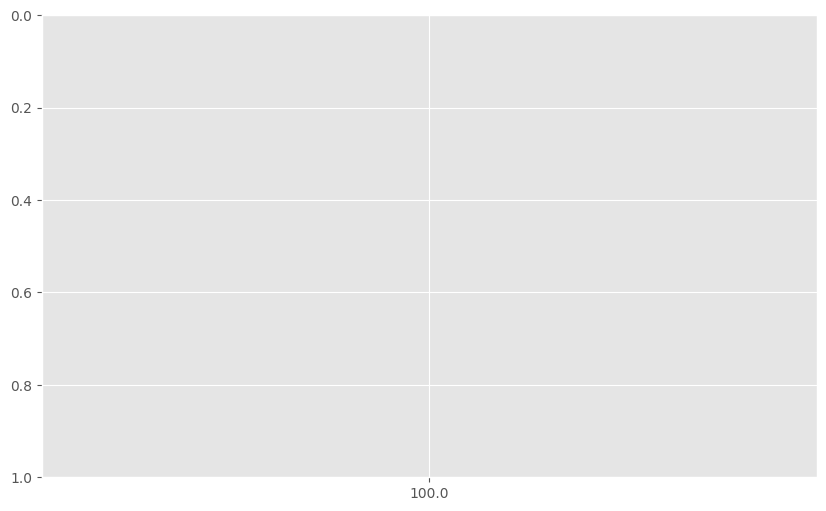

In [22]:
# ============================================================================
# CELLULE FINALE - EXÉCUTION DE TOUTES LES NOUVELLES VISUALISATIONS
# ============================================================================

# Importer les bibliothèques supplémentaires nécessaires
import seaborn as sns
from scipy import stats

print("🚀 LANCEMENT DE L'ANALYSE COMPLÈTE AVEC VISUALISATIONS AVANCÉES")
print("=" * 80)

# 1. Exécuter d'abord l'analyse par type d'annotation
print("\n📊 ÉTAPE 1: Analyse par type d'annotation")
type_analysis_results = main_annotation_type_analysis()

print("\n🎨 ÉTAPE 2: Visualisations avancées User4 vs User9")
visualization_result = execute_all_advanced_visualizations()

print("\n✅ ANALYSE TERMINÉE!")
print("=" * 80)
print("📁 FICHIERS CRÉÉS:")
print("   📈 Analyses par type:")
print("      - taux_validation_par_type.png")
print("      - comparaison_user4_user9_par_type.png")
print("      - distribution_types_annotations.png")
print("")
print("   🎯 Visualisations avancées User4 vs User9:")
print("      - heatmap_user4_user9_performance.png")
print("      - radar_user4_user9_performance.png")
print("      - barres_empilees_user4_user9.png")
print("      - scatter_volume_performance_user4_user9.png")
print("      - violin_plot_user4_user9.png")
print("      - matrices_confusion_user4_user9.png")
print("      - evolution_performance_user4_user9.png")
print("      - specialites_user4_user9.png")
print("      - dashboard_comparatif_user4_user9.png")
print("=" * 80)

# Résumé des insights clés
print("\n🔍 INSIGHTS CLÉS DÉCOUVERTS:")
print("=" * 40)

# Calculer quelques statistiques rapides pour le résumé
user4_data = df[df['USER'] == 'User4']
user9_data = df[df['USER'] == 'User9']

user4_total = len(user4_data)
user4_ok_rate = (len(user4_data[user4_data['STATUS'] == 'OK']) / user4_total) * 100
user9_total = len(user9_data)  
user9_ok_rate = (len(user9_data[user9_data['STATUS'] == 'OK']) / user9_total) * 100

print(f"📌 User4: {user4_total} annotations, {user4_ok_rate:.1f}% de réussite")
print(f"📌 User9: {user9_total} annotations, {user9_ok_rate:.1f}% de réussite")
print(f"📌 Différence de performance: {abs(user4_ok_rate - user9_ok_rate):.1f}%")

# Types d'annotations les plus fréquents pour chaque utilisateur
user4_top_type = user4_data['CL'].value_counts().index[0]
user9_top_type = user9_data['CL'].value_counts().index[0]
print(f"📌 Type principal User4: {user4_top_type}")
print(f"📌 Type principal User9: {user9_top_type}")

# Nombre de types uniques
user4_unique_types = len(user4_data['CL'].unique())
user9_unique_types = len(user9_data['CL'].unique())
print(f"📌 Diversité User4: {user4_unique_types} types différents")
print(f"📌 Diversité User9: {user9_unique_types} types différents")

print("\n" + "=" * 80)
print("🎉 ANALYSE COMPLÈTE TERMINÉE - CONSULTEZ LES GRAPHIQUES GÉNÉRÉS!")
print("=" * 80)
